# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

# Imports

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow.contrib.layers import flatten
import cv2
import glob
import matplotlib.image as mpimg
import pandas as pd
import time
%matplotlib inline

# Step 0: Load The Data
<span style="color:green"><b>Training, Testing and Validation Datasets</b></span>

In [2]:
# The .p refers to a pickle file.
training_file = "/Users/michaelgreen/mg/tech/MOOC/Udacity/SDCND/Term 1/P2 Traffic Sign Classification/traffic-signs-data/train.p"
validation_file= "/Users/michaelgreen/mg/tech/MOOC/Udacity/SDCND/Term 1/P2 Traffic Sign Classification/traffic-signs-data/valid.p"
testing_file = "/Users/michaelgreen/mg/tech/MOOC/Udacity/SDCND/Term 1/P2 Traffic Sign Classification/traffic-signs-data/test.p"
# 'r' when the file is to be read.
# 'b' appended to the mode opens the file in binary mode: now the data is read and written in the form of bytes objects.
# This mode should be used for all files that don't contain text.
with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

# Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 
## Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas
<span style="color:green"><b>Basic Summary of the Data Set</b></span>

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# Number of training examples
n_train = len(X_train)
# Number of testing examples.
n_test = len(X_test)
# What's the shape of an traffic sign image?
image_shape = X_train[0].shape
# How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))
# Number of validation examples.
n_valid = len(X_valid)

print('Basic Summary of the Data Set')
print('*****************************')
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
# print(y_train[30000:30500])
print("X_valid shape:", X_valid.shape)
print("y_valid shape:", y_valid.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)
print()
print("Number of training and validation examples =", n_train + n_valid)
print("Number of validation examples =", n_valid)
percent_held_back = (n_valid / (n_train + n_valid)) * 100
print("{:.0f}% of the data set has been held back for validation.".format(percent_held_back))
print()
print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of training classes =", n_classes)

Basic Summary of the Data Set
*****************************
X_train shape: (34799, 32, 32, 3)
y_train shape: (34799,)
X_valid shape: (4410, 32, 32, 3)
y_valid shape: (4410,)
X_test shape: (12630, 32, 32, 3)
y_test shape: (12630,)

Number of training and validation examples = 39209
Number of validation examples = 4410
11% of the data set has been held back for validation.

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of training classes = 43


## Include an exploratory visualization of the dataset
Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.
### `display_random_images()`
A function to display random images from the training dataset.

<span style="color:green"><b>Random Images from the Training Dataset</b></span>

In [4]:
# Data exploration visualization code goes here.
# Feel free to use as many code cells as needed.
# Visualizations will be shown in the notebook.
def display_random_images():
    print("Random Classes from the Training Dataset")
    # Display random training images.
    n_rows = 2
    n_columns = 10
    n_images = n_rows * n_columns
    fig_width = 18
    fig_height = 4
    w_space = .2
    h_space = .5

    # fig: matplotlib.figure.Figure object.
    # ax: Axes object or array of Axes objects.
    # ax can be either a single matplotlib.axes.Axes object or an array of Axes objects if more than one subplot was
    # created. The dimensions of the resulting array can be controlled with the squeeze keyword.
    fig, ax = plt.subplots(n_rows, n_columns, figsize=(fig_width, fig_height))
    # wspace: The amount of width reserved for blank space between subplots, expressed as a fraction of the average axis
    # width.
    # hspace: The amount of height reserved for white space between subplots, expressed as a fraction of the average axis
    # height.
    # axes lines: The lines around the plot.
    fig.subplots_adjust(wspace=w_space, hspace = h_space)
    ax = ax.ravel()
    for i in range(n_images):
        index = random.randint(0, len(X_train))
        image = X_train[index]
        ax[i].axis('off')
        ax[i].set_title('Class: ' + str(y_train[index]))
        ax[i].imshow(image)
    
    return

### Display Output of `display_random_images()`

Random Classes from the Training Dataset


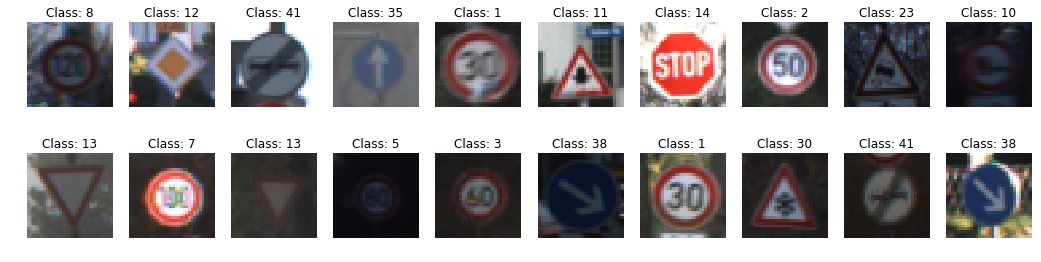

In [5]:
display_random_images()

### Analyse Class Distribution
Determine how many of each of the 43 classes of traffic signs are represented in the training data.

<span style="color:green"><b>Histogram of Training Dataset</b></span>

Number of training classes: 43
y_train.min = 0
y_train.max = 42
hist = [ 180 1980 2010 1260 1770 1650  360 1290 1260 1320 1800 1170 1890 1920  690
  540  360  990 1080  180  300  270  330  450  240 1350  540  210  480  240
  390  690  210  599  360 1080  330  180 1860  270  300  420]
bin_edges = [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]
bin_edges[0] = 0
bin_edges[1] = 1

Five classes among the most representated in the training dataset:
 2: 2010 Speed limit (50km/h)
 1: 1980 Speed limit (30km/h)
13: 1920 Yield
12: 1890 Priority road
38: 1860 Keep right

Five classes among the least represented in the training dataset:
19: 180 Dangerous curve to the left
 0: 180 Speed limit (20km/h)
37: 180 Go straight or left
27: 210 Pedestrians
32: 210 End of all speed and passing limits


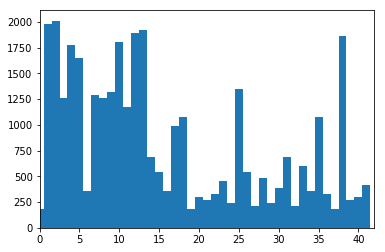

In [6]:
# Quantity of each class (0 - 42) of traffic sign.
print("Number of training classes:", n_classes)
hist, bin_edges = np.histogram(y_train, bins=range(n_classes))
print("y_train.min =", y_train.min())
print("y_train.max =", y_train.max())
print("hist =", hist)
print("bin_edges =", bin_edges)
print("bin_edges[0] =", bin_edges[0])
print("bin_edges[1] =", bin_edges[1])

# Note: learn an efficient way to do this sort/ID in Python...
# Determine the five largest and five smallest class representations.
print()
print("Five classes among the most representated in the training dataset:")
print(" 2:",hist[2],"Speed limit (50km/h)")
print(" 1:",hist[1],"Speed limit (30km/h)")
print("13:",hist[13],"Yield")
print("12:",hist[12],"Priority road")
print("38:",hist[38],"Keep right")
print()
print("Five classes among the least represented in the training dataset:")
print("19:",hist[19],"Dangerous curve to the left")
print(" 0:",hist[0],"Speed limit (20km/h)")
print("37:",hist[37],"Go straight or left")
print("27:",hist[27],"Pedestrians")
print("32:",hist[32],"End of all speed and passing limits")

#bin_width_factor = 1
# bin_width = bin_width_factor * (bin_edges[1] - bin_edges[0])
# bin_width = bin_width_factor * (bin_edges[n_classes-1] - bin_edges[0]) / n_classes
# center = (bin_edges[:-1] + bin_edges[1:]) / 2
# plt.bar(center, hist, align='center', width=bin_width)
# plt.show()

plt.bar(bin_edges[:-1], hist, width = 1)
plt.xlim(min(bin_edges), max(bin_edges))
plt.show()

It is evident that the 43 classes of traffic sign are not equaly represented in the training data.

# Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!
## Pre-process the Dataset (normalization, grayscale, etc.)
We want the values involved in the calculation of the loss function to never get too big or too small. One good guiding principle is that we always want the variables to have zero mean and equal variance whenever possible. We would like the values we compute roughly around a mean of zero and equal variance when we're doing optimization as it makes it a lot easier for the optimizer to do its job.

With images, it's simple; take the pixel values of the image (typically between 0 and 255) and simply subtract 128 and divide by 128 (for each channel). It doesn't change the content of the image, but it makes it much easier for the optimization to proceed numerically.

The weights and biases should be initialized at a good-enough starting point for the gradient descent to proceed. A simple, general, method is to draw the weights randomly from a gaussian distribution with mean 0 and standard deviation sigma. The sigma value determines the order of magnitude of the outputs at the initial point of the optimization. Because of the softmax on top of it, the order of magnitude also determines the peakiness of the initial probability distribution. A large sigma will mean that the distribution will have large peaks, it’s going to be very opinionated. A small sigma means that the distribution is very uncertain about things. It’s usually better to begin with an uncertain distribution and let the optimization become more confident as the training progresses. So, use a small sigma to begin with.
### Grayscale
Convert images to grayscale to help reduce training time and it's a lot easier for the model to classify images if it ignores color.

In [7]:
X_train_rgb = X_train
X_test_rgb = X_test
X_valid_rgb = X_valid

X_train_gray = np.sum(X_train/3, axis=3, keepdims=True)
X_test_gray = np.sum(X_test/3, axis=3, keepdims=True)
X_valid_gray = np.sum(X_valid/3, axis=3, keepdims=True)

print('Training data RGB shape:', X_train_rgb.shape)
print('Training data grayscale shape:', X_train_gray.shape)
print()
print('Testing data RGB shape:', X_test_rgb.shape)
print('Testing data grayscale shape:', X_test_gray.shape)
print()
print('Valid data RGB shape:', X_valid_rgb.shape)
print('Valid data grayscale shape:', X_valid_gray.shape)

Training data RGB shape: (34799, 32, 32, 3)
Training data grayscale shape: (34799, 32, 32, 1)

Testing data RGB shape: (12630, 32, 32, 3)
Testing data grayscale shape: (12630, 32, 32, 1)

Valid data RGB shape: (4410, 32, 32, 3)
Valid data grayscale shape: (4410, 32, 32, 1)


<span style="color:orange"><b>Set Datasets to Grayscale</b></span>

<span style="color:orange">The conversion went well, so set the training, test and validation data to the grayscale sets.</span>

In [8]:
X_train = X_train_gray
X_test = X_test_gray
X_valid = X_valid_gray

print('The training, testing and validation datasets have been set to grayscale.')

The training, testing and validation datasets have been set to grayscale.


`display_random_gray_images()`
This function displays random images from the training dataset, which are now, gray.

In [9]:
# Data exploration visualization code goes here.
# Feel free to use as many code cells as needed.
# Visualizations will be shown in the notebook.
def display_random_gray_images():
    print("Random Classes from the Training Dataset")
    # Display random training images.
    n_rows = 2
    n_columns = 10
    n_images = n_rows * n_columns
    fig_width = 18
    fig_height = 4
    w_space = .2
    h_space = .5

    # fig: matplotlib.figure.Figure object.
    # ax: Axes object or array of Axes objects.
    # ax can be either a single matplotlib.axes.Axes object or an array of Axes objects if more than one subplot was
    # created. The dimensions of the resulting array can be controlled with the squeeze keyword.
    fig, ax = plt.subplots(n_rows, n_columns, figsize=(fig_width, fig_height))
    # wspace: The amount of width reserved for blank space between subplots, expressed as a fraction of the average axis
    # width.
    # hspace: The amount of height reserved for white space between subplots, expressed as a fraction of the average axis
    # height.
    # axes lines: The lines around the plot.
    fig.subplots_adjust(wspace=w_space, hspace = h_space)
    ax = ax.ravel()
    for i in range(n_images):
        index = random.randint(0, len(X_train))
        image = X_train[index].squeeze()
        ax[i].axis('off')
        ax[i].set_title('Class: ' + str(y_train[index]))
        ax[i].imshow(image, cmap='gray')
    
    return

Display Output of `display_random_gray_images()`

Random Classes from the Training Dataset


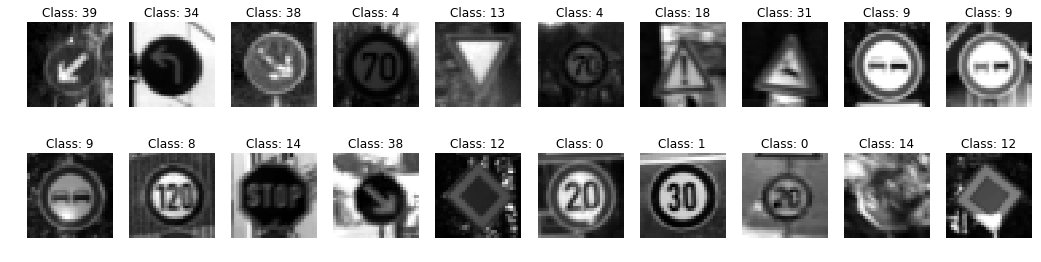

In [10]:
display_random_gray_images()

### Zero Mean and Equal Variance

In [11]:
print(np.mean(X_train))
print(np.mean(X_test))
print(np.mean(X_valid))

82.677589037
82.1484603612
83.5564273756


We seek a zero mean for the datasets...

In [12]:
X_train_normalized = (X_train - 128)/128 
X_test_normalized = (X_test - 128)/128
X_valid_normalized = (X_valid - 128)/128

print(np.mean(X_train_normalized))
print(np.mean(X_test_normalized))
print(np.mean(X_valid_normalized))

-0.354081335648
-0.358215153428
-0.347215411128


Verify that the image isn't changed...

Original shape: (34799, 32, 32, 1)
Normalized shape: (34799, 32, 32, 1)

Original and Normalized Image


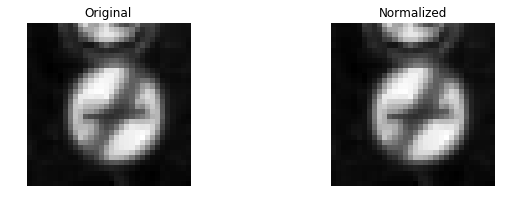

In [13]:
print("Original shape:", X_train.shape)
print("Normalized shape:", X_train_normalized.shape)

# Plot
fig, axs = plt.subplots(1,2, figsize=(10, 3))
axs = axs.ravel()

axs[0].axis('off')
axs[0].set_title('Original')
axs[0].imshow(X_train[0].squeeze(), cmap='gray')

axs[1].axis('off')
axs[1].set_title('Normalized')
axs[1].imshow(X_train_normalized[0].squeeze(), cmap='gray')
print()
print('Original and Normalized Image')

<span style="color:orange"><b>Normalize the Datasets</b></span>

<span style="color:orange">The conversion went well, so set the training, test and validation data to the normalized sets.</span>

In [14]:
X_train = X_train_normalized
X_test = X_test_normalized
X_valid = X_valid_normalized

print('The training, testing and validation datasets have been set to grayscale.')

The training, testing and validation datasets have been set to grayscale.


### Data Augmentation
As evidenced in the histogram of the dataset, the classes are not equally represented. This can be remedied by augmenting the original dataset by taking from this initial dataset and modifying individual images to bolster the count of lagging classes. Performing scaling, translation and warping on the images, as well as, adjusting the brightness are four common methods employed in data augmentation.

<span style="color:green"><b>Data Augmentation</b></span>

`random_scaling()`

This function zooms-in or zooms-out on the provided image and returns this result the same size as the original image. It will not, not scale the image; it will change the image by either zooming-in or out. If if zooms-in, the edge pixels are replicated so as to not create a discernable border.

In [15]:
def random_scaling(img):
    # rows and columns of the image shape; _ would be the pixel color value.
    rows,cols,_ = img.shape
    image_size = (rows,cols)
    # Establish limits for the scaling.
    # random int -2 to 2, inclusive...
    adj = random.choice([-2,-1,1,2])
    #print('adj:',adj,'pixels')
    
    # The four corners of the image.
    starting_corners = np.float32([[0,0],[rows,0],[0,cols],[rows,cols]])
    #print(starting_corners)
    
    # The for corners of the zoomed-in area.
    adj_corners = np.float32([[adj,adj],[rows-adj,adj],[adj,cols-adj],[rows-adj,cols-adj]])
    #print(adj_corners)
    
    # The getPerspectiveTransform() calculates a perspective transform from
    # four pairs of the corresponding points.
    # mapMatrix, M
    M = cv2.getPerspectiveTransform(adj_corners,starting_corners)
    # warpPerspective applies a perspective tranformation to an image.
    # The warpPerspective transforms the source image using the specified matrix.
    # warpPerspective takes a 3x3 transformation matrix as input.
    # dst: output image that has the size dsize and teh same type as src.
    dst = cv2.warpPerspective(img,M,image_size,borderMode=cv2.BORDER_REPLICATE)
    # The np.newaxis object can be used in all slicing operations to create an
    # axis of length one. newaxis is an alias for 'None', and 'None' can be used
    # in place of this with the same result.
    dst = dst[:,:,np.newaxis]
    
    return dst

Run and Display Output for `random_scaling()`

Elapsed time: 0.0007281303405761719
Original/Scaled shapes: (32, 32, 1) (32, 32, 1)

Scale the Image


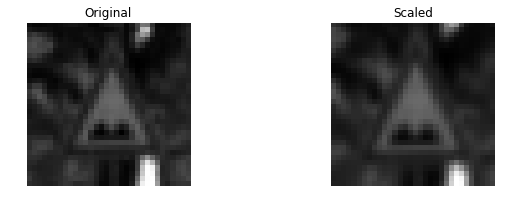

In [16]:
index = random.randint(0, len(X_train))
test_image = X_train[index]

start_time = time.time()
scaled_test_image = random_scaling(test_image)
elapsed_time = time.time() - start_time
total_time = elapsed_time
    
fig, axs = plt.subplots(1,2, figsize=(10, 3))

axs[0].axis('off')
axs[0].imshow(test_image.squeeze(), cmap='gray')
axs[0].set_title('Original')

axs[1].axis('off')
axs[1].imshow(scaled_test_image.squeeze(), cmap='gray')
axs[1].set_title('Scaled')

# print('adj:',adj)
print('Elapsed time:', elapsed_time)
print('Original/Scaled shapes:', test_image.shape, scaled_test_image.shape)
print()
print('Scale the Image')

`random_translate()`

This function translates an image in either the x or y direction or both, but not in neither direction. It translates some combination of left, right, up, down. The edge pixels are replicated so as to not create a discernable border.

In [17]:
def random_translate(img):
    rows,cols,_ = img.shape
    image_size = (rows,cols)
    
    dx = random.choice([-2,-1,0,1,2])
    dy = random.choice([-2,-1,0,1,2])
    while dx == 0 and dy == 0:
        dx = random.choice([-2,-1,1,2])

    M = np.float32([[1,0,dx],[0,1,dy]])
    # warpAffine applies an affine transformation to an image.
    # warpAffine takes a 2x3 transformation matrix.
    dst = cv2.warpAffine(img,M,image_size,borderMode=cv2.BORDER_REPLICATE)
    dst = dst[:,:,np.newaxis]
    
    return dst

Run and Display Output for `random_translate()`

Elapsed time: 0.0005459785461425781
Original/Translated shapes: (32, 32, 1) (32, 32, 1)

Translate the Image


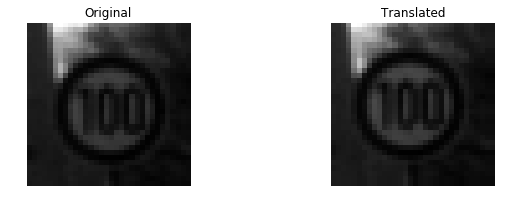

In [18]:
index = random.randint(0, len(X_train))
test_image = X_train[index]

start_time = time.time()
translated_test_image = random_translate(test_image)
elapsed_time = time.time() - start_time
total_time += elapsed_time

# Plot
fig, axs = plt.subplots(1,2, figsize=(10, 3))

axs[0].axis('off')
axs[0].imshow(test_image.squeeze(), cmap='gray')
axs[0].set_title('Original')

axs[1].axis('off')
axs[1].imshow(translated_test_image.squeeze(), cmap='gray')
axs[1].set_title('Translated')

# print('dx:',dx,'dy:',dy)
print('Elapsed time:',elapsed_time)
print('Original/Translated shapes:', test_image.shape, translated_test_image.shape)
print()
print('Translate the Image')

`random_warp()`

This function warps an image. A warp is translating three points.

In [19]:
def random_warp(img):
    rows,cols,_ = img.shape
    image_size = (rows,cols)
    
    # Random values in a given shape.
    # Create an array of the given shape and populate it with random samples
    # from a uniform distribution over [0, 1).
    # random scaling coefficients
    npoints = 3
    adj = -0.5
    adj_factor = 0.08
    
    # These coefficients determines the degree of warping.
    dx = np.random.rand(npoints) + adj
    dx *= cols * adj_factor   
    dy = np.random.rand(npoints) + adj
    dy *= rows * adj_factor

    # These corners aren't working well.
#     x1 = 0
#     y1 = 0
#     x2 = 32
#     y2 = 32
    
    # Move the corners in a bit...
    x1 = cols/4
    y1 = rows/4
    x2 = 3*cols/4
    y2 = 3*rows/4   

    pts1 = np.float32([[y1,x1],
                       [y2,x1],
                       [y1,x2]])
    pts2 = np.float32([[y1+dy[0],x1+dx[0]],
                       [y2+dy[1],x1+dx[1]],
                       [y1+dy[2],x2+dx[2]]])

    M = cv2.getAffineTransform(pts1,pts2)
    dst = cv2.warpAffine(img,M,image_size,borderMode=cv2.BORDER_REPLICATE)
    dst = dst[:,:,np.newaxis]
    
    return dst

Run and Display Output for `random_warp()`

Elapsed time: 0.00030994415283203125
Original/Warped shapes: (32, 32, 1) (32, 32, 1)

Warp the Image


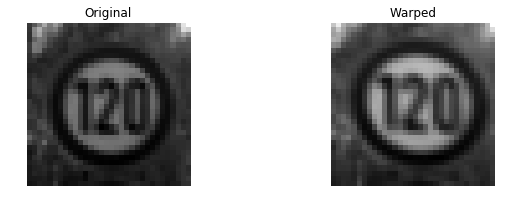

In [20]:
index = random.randint(0, len(X_train))
test_image = X_train[index]

start_time = time.time()
warped_test_image = random_warp(test_image)
elapsed_time = time.time() - start_time
total_time += elapsed_time

# Plot
fig, axs = plt.subplots(1,2, figsize=(10, 3))

axs[0].axis('off')
axs[0].imshow(test_image.squeeze(), cmap='gray')
axs[0].set_title('Original')

axs[1].axis('off')
axs[1].imshow(warped_test_image.squeeze(), cmap='gray')
axs[1].set_title('Warped')

# print('dx:',dx,'dy:',dy)
print('Elapsed time:',elapsed_time)
print('Original/Warped shapes:', test_image.shape, warped_test_image.shape)
print()
print('Warp the Image')

`random_brightness()`

In [21]:
def random_brightness(img):
    shifted = img + 1.0   # shift to (0,2) range
    img_max_value = max(shifted.flatten())
    
    max_coef = 2.0/img_max_value
    min_coef = max_coef - 0.1
    coef = np.random.uniform(min_coef, max_coef)
    
    dst = shifted * coef - 1.0
    
#     print('img.shape:',img.shape)
#     print('shifted = img + 1.0')
#     print('shifted.shape:',shifted.shape)
#     print('shifted.flatten().shape:',shifted.flatten().shape)
#     print('img[5][5]:',img[5][5])
#     print('shifted[5][5]:',shifted[5][5])
#     print(img_max_value)
    
    return dst

Run and Display Output for `random_brightness()`

Elapsed time: 0.0003418922424316406
Original/Brightness Adjusted shapes: (32, 32, 1) (32, 32, 1)

Adjust Image Brightness


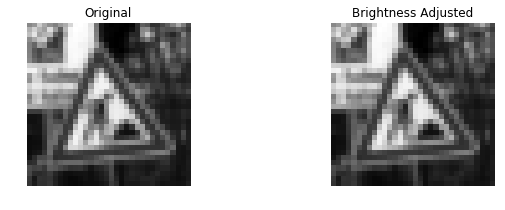

In [22]:
index = random.randint(0, len(X_train))
test_image = X_train[index]

start_time = time.time()
adj_brightness_image = random_brightness(test_image)
elapsed_time = time.time() - start_time
total_time += elapsed_time

fig, axs = plt.subplots(1,2, figsize=(10, 3))

axs[0].axis('off')
axs[0].imshow(test_image.squeeze(), cmap='gray')
axs[0].set_title('Original')

axs[1].axis('off')
axs[1].imshow(adj_brightness_image.squeeze(), cmap='gray')
axs[1].set_title('Brightness Adjusted')

print('Elapsed time:',elapsed_time)
print('Original/Brightness Adjusted shapes:', test_image.shape, adj_brightness_image.shape)
print()
print('Adjust Image Brightness')

`augment()`

In [23]:
def augment(img):
    ##### SCALING #####
    
    # rows and columns of the image shape; _ would be the pixel color value.
    rows,cols,_ = img.shape
    image_size = (rows,cols)
    # Establish limits for the scaling.
    # random int -2 to 2, inclusive...
    adj = random.choice([-2,-1,1,2])
    #print('adj:',adj,'pixels')
    
    # The four corners of the image.
    starting_corners = np.float32([[0,0],[rows,0],[0,cols],[rows,cols]])
    #print(starting_corners)
    
    # The for corners of the zoomed-in area.
    adj_corners = np.float32([[adj,adj],[rows-adj,adj],[adj,cols-adj],[rows-adj,cols-adj]])
    #print(adj_corners)
    
    # The getPerspectiveTransform() calculates a perspective transform from
    # four pairs of the corresponding points.
    # mapMatrix, M
    M = cv2.getPerspectiveTransform(adj_corners,starting_corners)
    # warpPerspective applies a perspective tranformation to an image.
    # The warpPerspective transforms the source image using the specified matrix.
    # warpPerspective takes a 3x3 transformation matrix as input.
    # dst: output image that has the size dsize and teh same type as src.
    dst = cv2.warpPerspective(img,M,image_size,borderMode=cv2.BORDER_REPLICATE)
    # The np.newaxis object can be used in all slicing operations to create an
    # axis of length one. newaxis is an alias for 'None', and 'None' can be used
    # in place of this with the same result.
    scaled_image = dst[:,:,np.newaxis]
    
#     print('scaling M:',M)
    
#     return dst
    
    ##### TRANSLATE #####
    
#     rows,cols,_ = img.shape
#     image_size = (rows,cols)
    
    dx = random.choice([-2,-1,0,1,2])
    dy = random.choice([-2,-1,0,1,2])
    while dx == 0 and dy == 0:
        dx = random.choice([-2,-1,1,2])

    M = np.float32([[1,0,dx],[0,1,dy]])
    # warpAffine applies an affine transformation to an image.
    # warpAffine takes a 2x3 transformation matrix.
    dst = cv2.warpAffine(scaled_image,M,image_size,borderMode=cv2.BORDER_REPLICATE)
    translated_image = dst[:,:,np.newaxis]
    
#     print('translate M:',M)
    
#     return dst

    ##### WARP #####
    
#     rows,cols,_ = img.shape
#     image_size = (rows,cols)
    
    # Random values in a given shape.
    # Create an array of the given shape and populate it with random samples
    # from a uniform distribution over [0, 1).
    # random scaling coefficients
    npoints = 3
    adj = -0.5
    adj_factor = 0.08
    
    # These coefficients determines the degree of warping.
    dx = np.random.rand(npoints) + adj
    dx *= cols * adj_factor   
    dy = np.random.rand(npoints) + adj
    dy *= rows * adj_factor

    # These corners aren't working well.
#     x1 = 0
#     y1 = 0
#     x2 = 32
#     y2 = 32
    
    # Move the corners in a bit...
    x1 = cols/4
    y1 = rows/4
    x2 = 3*cols/4
    y2 = 3*rows/4   

    pts1 = np.float32([[y1,x1],
                       [y2,x1],
                       [y1,x2]])
    pts2 = np.float32([[y1+dy[0],x1+dx[0]],
                       [y2+dy[1],x1+dx[1]],
                       [y1+dy[2],x2+dx[2]]])

    M = cv2.getAffineTransform(pts1,pts2)
    dst = cv2.warpAffine(translated_image,M,image_size,borderMode=cv2.BORDER_REPLICATE)
    warped_image = dst[:,:,np.newaxis]
    
#     print('warp M:',M)
    
#     return dst

    ##### BRIGHTNESS #####
    
    shifted = warped_image + 1.0   # shift to (0,2) range
    img_max_value = max(shifted.flatten())
    
    max_coef = 2.0/img_max_value
    min_coef = max_coef - 0.1
    coef = np.random.uniform(min_coef, max_coef)
    
    brightness_image = shifted * coef - 1.0
    
#     print('img.shape:',img.shape)
#     print('shifted = img + 1.0')
#     print('shifted.shape:',shifted.shape)
#     print('shifted.flatten().shape:',shifted.flatten().shape)
#     print('img[5][5]:',img[5][5])
#     print('shifted[5][5]:',shifted[5][5])
#     print(img_max_value)
    
#     return dst

    return brightness_image

Run and Display Output of `augment()`

Total elapsed time: 0.0019259452819824219
Elapsed time: 0.0006999969482421875
Time diff between individual calls and combo call: 0.0012259483337402344

Original/Augmented shapes: (32, 32, 1) (32, 32, 1)

Augmented Image


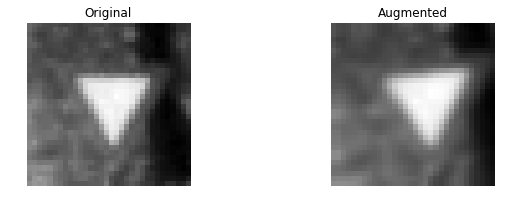

In [24]:
index = random.randint(0, len(X_train))
test_image = X_train[index]

start_time = time.time()
augmented_image = augment(test_image)
elapsed_time = time.time() - start_time

fig, axs = plt.subplots(1,2, figsize=(10, 3))

axs[0].axis('off')
axs[0].imshow(test_image.squeeze(), cmap='gray')
axs[0].set_title('Original')

axs[1].axis('off')
axs[1].imshow(augmented_image.squeeze(), cmap='gray')
axs[1].set_title('Augmented')

print('Total elapsed time:',total_time)
print('Elapsed time:',elapsed_time)
print('Time diff between individual calls and combo call:',total_time-elapsed_time)
print()
print('Original/Augmented shapes:', test_image.shape, augmented_image.shape)
print()
print('Augmented Image')

Minimum and Maximum Number of Samples of Label Classes

In [25]:
# Count number of occurrences of each value in array of non-negative ints.
print('y_train.shape:',y_train.shape)
print('y_train:',y_train)
print('np.bincount(y_train):',np.bincount(y_train))
print()
n_max_class_occurence = max(np.bincount(y_train))
n_min_class_occurence = min(np.bincount(y_train))
print("Minimum samples for any label class:", n_min_class_occurence)
print("Maximum samples for any label class:", n_max_class_occurence)

y_train.shape: (34799,)
y_train: [41 41 41 ..., 25 25 25]
np.bincount(y_train): [ 180 1980 2010 1260 1770 1650  360 1290 1260 1320 1800 1170 1890 1920  690
  540  360  990 1080  180  300  270  330  450  240 1350  540  210  480  240
  390  690  210  599  360 1080  330  180 1860  270  300  210  210]

Minimum samples for any label class: 180
Maximum samples for any label class: 2010


<span style="color:orange"><b>Augment the Training Dataset</b></span>

In [26]:
# print('X, y shapes:', X_train_normalized.shape, y_train.shape)
print('X, y shapes:', X_train.shape, y_train.shape)

req_min_n_samples_per_class = n_max_class_occurence

# input_indices = []
# output_indices = []

smallest_double_digit_int = 10

start_time = time.time()
for class_n in range(n_classes):
    # Print progress...
    if class_n < smallest_double_digit_int:
        # end doesn't really equate to a newline.
        # end=' ' actually means that you want a space after the end of the statement 
        # instead of a new line character, so you can continue on the same line
        # with "Whatever"
        print('', class_n, ': ', end='')
    else:
        print(class_n, ': ', end='')
    
    # y_train is a large vector where each value is a label class integer.
    # Collect all the indices of y_train where the value corresponds to class_n.
    # np.where; If only condition is given, return condition.nonzero().
    class_indices = np.where(y_train == class_n)
    # The number of indices of y_train where the value corresponds to class_n.
    # This is the number of training instances of this label class in the training dataset.
    n_samples = len(class_indices[0])
    
    # If the number of training samples of this class is less than that required...
    if n_samples < req_min_n_samples_per_class:
        # Make up the difference by augmenting the dataset.
        for i in range(req_min_n_samples_per_class - n_samples):
            
#             input_indices.append(class_indices[0][i%n_samples])
#             output_indices.append(X_train_normalized.shape[0])
            
            new_img = X_train[class_indices[0][i%n_samples]]
#             new_img = X_train[class_indices[0][i]]
#             new_img = random_translate(random_scaling(random_warp(random_brightness(new_img))))
            new_img = augment(new_img) 
            # Add the new image to the X dataset.
            X_train = np.concatenate((X_train, [new_img]), axis=0)
            # Update the y dataset with the class of the added image.
            y_train = np.concatenate((y_train, [class_n]), axis=0)
            
            # Print progress...
            if i % 500 == 0:
                print('|', end='')
            elif i % 100 == 0:
                print('-',end='')
    print('')
         
print('elapsed time:', time.time() - start_time)
# print('X, y shapes:', X_train_normalized.shape, y_train.shape)
print('X, y shapes:', X_train.shape, y_train.shape)

X, y shapes: (34799, 32, 32, 1) (34799,)
 0 : |----|----|----|---
 1 : |
 2 : 
 3 : |----|--
 4 : |--
 5 : |---
 6 : |----|----|----|-
 7 : |----|--
 8 : |----|--
 9 : |----|-
10 : |--
11 : |----|---
12 : |-
13 : |
14 : |----|----|---
15 : |----|----|----
16 : |----|----|----|-
17 : |----|----|
18 : |----|----
19 : |----|----|----|---
20 : |----|----|----|--
21 : |----|----|----|--
22 : |----|----|----|-
23 : |----|----|----|
24 : |----|----|----|--
25 : |----|-
26 : |----|----|----
27 : |----|----|----|--
28 : |----|----|----|
29 : |----|----|----|--
30 : |----|----|----|-
31 : |----|----|---
32 : |----|----|----|--
33 : |----|----|----
34 : |----|----|----|-
35 : |----|----
36 : |----|----|----|-
37 : |----|----|----|---
38 : |-
39 : |----|----|----|--
40 : |----|----|----|--
41 : |----|----|----|--
42 : |----|----|----|--
elapsed time: 14212.16071486473
X, y shapes: (86430, 32, 32, 1) (86430,)


## Model Architecture
Define your architecture here.
Feel free to use as many code cells as needed.

In [68]:
print('...')
tf.reset_default_graph()

...


In [69]:
print('...')
### Define your architecture here.
### Feel free to use as many code cells as needed.

# Number of times to run data through the network.
# In general, the more epochs, the better the model will train.
# But, also, the longer training will take.
EPOCHS = 10#100#8#10 
# Number of training images to run through the network at a time.
# The larger the batch size, the faster the model will train.
# But, the processor may have a memory limit on how large a batch it can run.
BATCH_SIZE = 256#128

...


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

Calculate and report the accuracy on the training and validation set.
Once a final model architecture is selected,
the accuracy on the test set should be calculated and reported as well.
Feel free to use as many code cells as needed.
### LeNet architecture
`le_net()`

<span style="color:green"><b>LeNet Architecture</b></span>

In [70]:
print('...')
# For switching between RGB and grayscale.
color_shape = 1 # 3 for rgb; 1 for gray
# X_data = X_train
# X_eval_data = X_valid

...


In [71]:
print('...')
def le_net(x, keep_prob):
    mu = 0
    sigma = 0.1
    # Layer1 32*32*1 --> 28*28*16 
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5,5,1,16), mean = mu, stddev = sigma), name = 'conv1_W')
    conv1_b = tf.Variable(tf.constant(0.1, shape = [16]), name = 'conv1_b')
    conv1 = tf.add(tf.nn.conv2d(x,conv1_W, strides = [1,1,1,1], padding = 'VALID') , conv1_b)
    #Layer1 activation 
    conv1 = tf.nn.relu(conv1)
    #Layer1 pooling 28*28*16 --> 14*14*16
    conv1 = tf.nn.max_pool(conv1, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'VALID')
    
    # Layer2  14*14*16 --> 10*10*32
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5,5,16,32), mean = mu , stddev = sigma), name = 'conv2_W')
    conv2_b = tf.Variable(tf.constant(0.1, shape = [32]), name = 'conv2_b')
    conv2 = tf.add(tf.nn.conv2d(conv1, conv2_W, strides = [1,1,1,1], padding = 'VALID') , conv2_b)
    #Layer2 activation
    conv2 = tf.nn.relu(conv2)
    #Later2 pooling 10*10*32 --> 5*5*32 
    conv2 = tf.nn.max_pool(conv2, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'VALID')
    # Flatten 5*5*32 --> 800
    fc0 = flatten(conv2)
    
    # Layer3  800--> 516
    fc1_W = tf.Variable(tf.truncated_normal(shape = (800,516), mean = mu , stddev = sigma), name = 'fc1_W')
    fc1_b = tf.Variable(tf.constant(0.1, shape = [516]), name = 'fc1_b')
    fc1 = tf.add(tf.matmul(fc0, fc1_W) , fc1_b)
    #Layer3 activation
    fc1 = tf.nn.relu(fc1)
    # Dropout 
    fc1 = tf.nn.dropout(fc1,keep_prob)
    
    # Layer4 516 --> 360
    fc2_W = tf.Variable(tf.truncated_normal(shape = (516,360), mean = mu , stddev = sigma), name = 'fc2_W')
    fc2_b = tf.Variable(tf.constant(0.1, shape = [360]), name = 'fc2_b')
    fc2 = tf.add(tf.matmul(fc1,fc2_W) , fc2_b)
    #Layer4 activation
    fc2 = tf.nn.relu(fc2)
    #Dropout 
    fc2 = tf.nn.dropout(fc2,keep_prob)
    
    #Layer5 360 --> 43
    fc3_W = tf.Variable(tf.truncated_normal(shape = (360,43), mean = mu, stddev = sigma), name = 'fc3_W')
    fc3_b = tf.Variable(tf.constant(0.1, shape =[43]), name = 'fc3_b')
    logits = tf.add(tf.matmul(fc2,fc3_W) , fc3_b)
    
    return logits

...


Earlier

## Features and Labels

In [72]:
print('...')
# Setup the TensorFlow variables.
# x is a placeholder that will store the input batches.
# Initialize the batch size to None, to allow
# the placeholder to later accept a batch of any size.
# Set the image dimensions to 32x32x3.
x = tf.placeholder(tf.float32, (None, 32, 32, color_shape))
# y stores our labels
# In this case, the labels come through as sparse variables,
# which just means that they're integers; they aren't one-hot encoded yet.
y = tf.placeholder(tf.int32, (None))
# For dropout
keep_prob = tf.placeholder(tf.float32)
# One-hot encode the labels.
one_hot_y = tf.one_hot(y, 43)

...


## Training Pipeline

In [73]:
print('...')
# The learning rate hyperparameter tells TensorFlow
# how quickly to update the network's weights.
rate = 0.001
# Pass the input data to the LeNet function to calculate the logits.
# logits = le_net(x)
logits = le_net(x,keep_prob)
# Compare the logits to the ground truth labels and calculate the cross-entropy.
# Cross-entropy is a measure of how different the logits are from the ground truth
# training labels.
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
# Average the cross-entropy from all the training images.
loss_operation = tf.reduce_mean(cross_entropy)
# Use the Adam algorithm to minimize the loss function,
# similarly to what stochastic gradient descent does.
# The Adam algorithm is a little more sophisticated than stochastic gradient descent
# so it's a good default choice for an optimizer.
# Note the learning rate hyperparameter that was set earlier.
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
# Run the mimimize function on the optimizer, which uses back propagation
# to update the network and minimize the training loss.
training_operation = optimizer.minimize(loss_operation)

...


## Model Evaluation

This pipeline evaluates how good the model is.

In [74]:
print('...')
# Compare the logit prediction to the one-hot encoded ground truth label
# to measure whether a given prediction is correct.
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
# Calculate the model's overall accuracy by averaging the individual prediction accuracies.
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

saver = tf.train.Saver()

...


### `evaluate()`
This function averages the accuracy of each batch to calculate the total accuracy of the model.

In [75]:
print('...')
def evaluate(X_train, y_data,keep_prob):
    # Take a dataset as input.
    # Set some initialization variables.
    num_examples = len(X_train)
    total_accuracy = 0
    # Batch the dataset and run it through the evaluation pipeline.
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_train[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

...


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

Calculate and report the accuracy on the training and validation set.
Once a final model architecture is selected,
the accuracy on the test set should be calculated and reported as well.
Feel free to use as many code cells as needed.

<span style="color:green"><b>Train the Model</b></span>

In [76]:
print('...')
start_time = time.time()
with tf.Session() as sess:
    # Create the TensorFlow session and initialize the variables.
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        # At the beginning of each epoch, shuffle the training data to ensure
        # that the training isn't biased by the order of the images.
        X_train, y_train = shuffle(X_train, y_train)
        # Break the training data into batches and train the model on each batch.
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob : 0.25})
       
        # At the end of each epoch, evaluate the model on the validation data.
        validation_accuracy = evaluate(X_valid, y_valid, keep_prob)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    # Once the model is completely trained, save it.
    # This way, we can load it up later and modify it or
    # evaluate the model on the test dataset.
    saver.save(sess, './lenet')
    print("Model saved")
    
print('Execution time:', time.time() - start_time)

...
Training...

EPOCH 1 ...
Validation Accuracy = 0.665

EPOCH 2 ...
Validation Accuracy = 0.838

EPOCH 3 ...
Validation Accuracy = 0.901

EPOCH 4 ...
Validation Accuracy = 0.923

EPOCH 5 ...
Validation Accuracy = 0.941

EPOCH 6 ...
Validation Accuracy = 0.944

EPOCH 7 ...
Validation Accuracy = 0.951

EPOCH 8 ...
Validation Accuracy = 0.957

EPOCH 9 ...
Validation Accuracy = 0.965

EPOCH 10 ...
Validation Accuracy = 0.973

Model saved
Execution time: 570.2171928882599


## Log Results History for Experiments

## Calculate and Report the Accuracy on the Training Dataset

<span style="color:green"><b>Results on the Training Dataset</b></span>

In [101]:
print('...')
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.import_meta_graph('./lenet.meta')
    saver.restore(sess, "./lenet")
    train_accuracy = evaluate(X_train, y_train, keep_prob)
    print("Training Set Accuracy = {:.3f}".format(train_accuracy))

...
Training Set Accuracy = 0.990


## Calculate and Report the Accuracy on the Test Dataset

<span style="color:green"><b>Results on the Test Dataset</b></span>

In [102]:
print('...')
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.import_meta_graph('./lenet.meta')
    saver.restore(sess, "./lenet")
    test_accuracy = evaluate(X_test, y_test, keep_prob)
    print("Test Set Accuracy = {:.3f}".format(test_accuracy))

...
Test Set Accuracy = 0.949


## Calculate and Report the Accuracy on the Validation Dataset

<span style="color:green"><b>Results on the Validation Dataset</b></span>

In [103]:
print('...')
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.import_meta_graph('./lenet.meta')
    saver.restore(sess, "./lenet")
    valid_accuracy = evaluate(X_valid, y_valid, keep_prob)
    print("Validation Set Accuracy = {:.3f}".format(valid_accuracy))

...
Validation Set Accuracy = 0.973


---

# Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.
## Load and Output the Images
### For New Images...
### Display New Images

(5, 32, 32, 3)
Note: classes 2 and 13 are among the most represented classed in the training data.


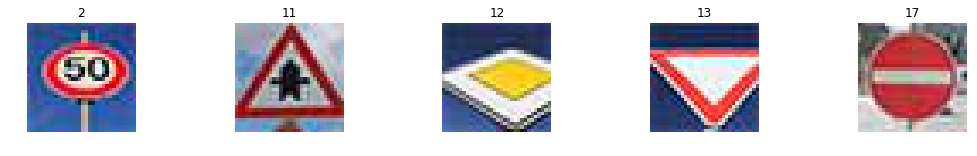

In [81]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

#reading in an image

# n_rows = 1
# n_columns = 10
# n_images = n_rows * n_columns
# fig_width = 18
# fig_height = 2
# w_space = .2
# h_space = .5

# fig, ax = plt.subplots(n_rows, n_columns, figsize=(fig_width, fig_height))
# fig.subplots_adjust(wspace=w_space, hspace = h_space)
# ax = ax.ravel()
# my_image = []
# for i, img in enumerate(glob.glob('./SupplementalGermanTrafficSigns/SupplementalGermanTrafficSigns/*.jpg')):
#     image = cv2.imread(img)
#     ax[i].axis('off')
#     ax[i].set_title(y_train[index])
#     ax[i].imshow(image)
    
 
n_rows = 1
n_columns = 5
fig_width = 18
fig_height = 2
w_space = .2
h_space = .5

fig, ax = plt.subplots(n_rows,n_columns, figsize=(fig_width, fig_height))
fig.subplots_adjust(hspace=h_space, wspace=w_space)
ax = ax.ravel()

X_new = []
#y_new = [2, 11, 12, 13, 17, 22, 23, 25, 38, 40]
y_new = [2, 11, 12, 13, 17]

for i, img in enumerate(glob.glob('./SupplementalGermanTrafficSigns/SupplementalGermanTrafficSigns/*.jpg')):
    image = cv2.imread(img)
    ax[i].axis('off')
    ax[i].set_title(y_new[i])
    ax[i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
#     ax[i].imshow(image)
    X_new.append(image)

X_new = np.asarray(X_new)

print(X_new.shape)
print("Note: classes 2 and 13 are among the most represented classed in the training data.")

Process New Images

In [82]:
X_new_rgb = X_new
X_new_gray = np.sum(X_new/3, axis=3, keepdims=True)
print(np.mean(X_new_gray))
X_new_normalized = (X_new_gray - 128)/128

print(np.mean(X_new_normalized))

X_new = X_new_normalized
print('X_new.shape:',X_new.shape)
print('y_new:',y_new)

125.922981771
-0.0162267049154
X_new.shape: (5, 32, 32, 1)
y_new: [2, 11, 12, 13, 17]


Display New Images (Gray)

(5, 32, 32, 1)
Note: classes 2 and 13 are among the most represented classed in the training data.


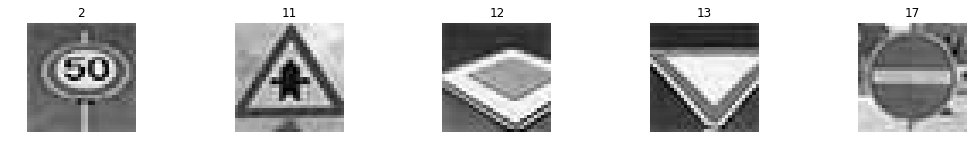

In [83]:
n_rows = 1
n_columns = 5
fig_width = 18
fig_height = 2
w_space = .2
h_space = .5

fig, ax = plt.subplots(n_rows,n_columns, figsize=(fig_width, fig_height))
fig.subplots_adjust(hspace=h_space, wspace=w_space)
ax = ax.ravel()

# y_new = [2, 11, 12, 13, 17]

for i, img in enumerate(X_new):
    ax[i].axis('off')
    ax[i].set_title(y_new[i])
    ax[i].imshow(img.squeeze(), cmap='gray')

print(X_new.shape)
print("Note: classes 2 and 13 are among the most represented classed in the training data.")

### Predict the Sign Type for Each Image

### Analyze Performance
#### For the new images...

In [105]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

#print(supplemental_labels)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.import_meta_graph('./lenet.meta')
    saver.restore(sess, "./lenet")
    supplemental_set_accuracy = evaluate(X_new, y_new, keep_prob)
    print("Supplemental Set Accuracy = {:.3f}".format(supplemental_set_accuracy))

Supplemental Set Accuracy = 0.400


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

#### For new images...

<span style="color:green"><b>Softmax Predictions</b></span>

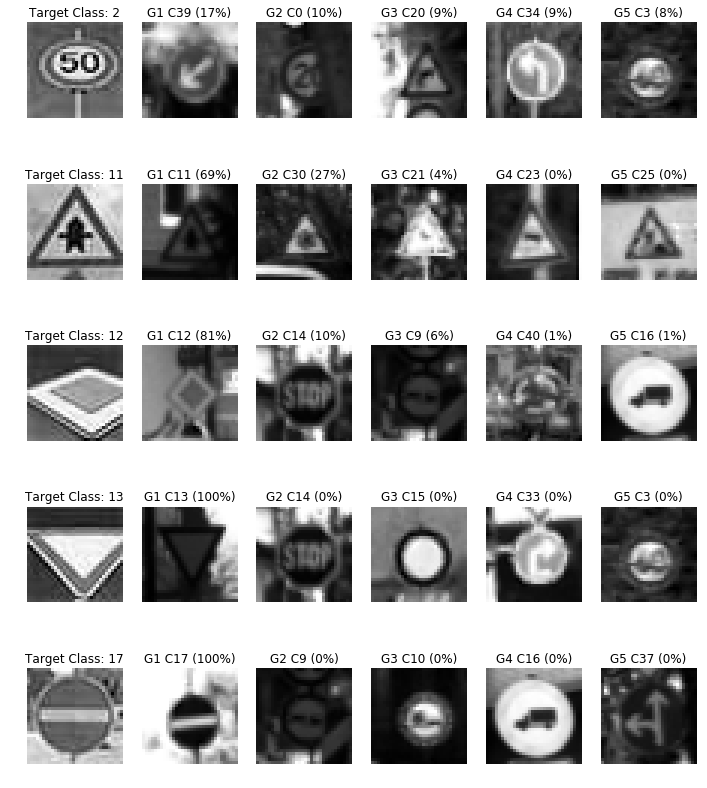

In [99]:
# This cell has the target class and all guesses, in a loop.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    predictions = sess.run(logits, feed_dict={x:X_new, keep_prob:0.5})#random_X_test
    probabilities = sess.run(tf.nn.softmax(predictions))
    # Get the top values (softmax probabilites) and
    # indices (class ids) of the top k predictions.
    # top_k_v is an array of arrays of k probabilites for X_new images.
    # top_k_i is an array of arrays of k guess for X_new images.
    top_k_v, top_k_i = sess.run(tf.nn.top_k(probabilities,k=5))
    #print("predictions:",predictions)
    #print("probabilities:",probabilities)
    #print("top_k_v:",top_k_v)
    #print("top_k_i:",top_k_i)

    n_top_guess_images = 5
    images_per_row = n_top_guess_images + 1
    fig, axs = plt.subplots(len(X_new),images_per_row, figsize=(12, 14))
    fig.subplots_adjust(hspace = .4, wspace=.2)
    axs = axs.ravel()
    for i, image in enumerate(X_new):#random_X_test
        # Source image
        axs[images_per_row*i].axis('off')
        axs[images_per_row*i].imshow(image.squeeze(), cmap='gray')
        axs[images_per_row*i].set_title('Target Class: ' + str(y_new[i]))#random_y_test
        
        # Loop through the guesses.
        for j in range(n_top_guess_images):
            guess = top_k_i[i][j]
            index = np.argwhere(y_valid == guess)[0][0]#y_test
    
            axs[images_per_row*i+j+1].axis('off')
            axs[images_per_row*i+j+1].imshow(X_valid[index].squeeze(), cmap='gray')
            axs[images_per_row*i+j+1].set_title('G{} C{} ({:.0f}%)'.format(j+1, guess, 100*top_k_v[i][j]))

#### For images other than new...

---

## Step 4: Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [97]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it maybe having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

### Question 9

Discuss how you used the visual output of your trained network's feature maps to show that it had learned to look for interesting characteristics in traffic sign images


**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 